## Linear Regression Using Gradient Descent

# Let's Recap
Last time we learned that simple (univariate) linear regression is a tool which helps us draw a line of best fit though a set of data. This line can then be used to make predictions for inputs we do not have data for. To find the slope $m$ and y-intercept $b$ of our best fit lines, we minimized our loss function $L$ to give us:
$$L_{m, b} = \sum_{i=1}^{n}{(y_i - (mx_i + b))^2}$$
$$m = \frac{\sum_{i=1}^{n}{(x_i - \bar{x})(y_i - \bar{y})}}{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}$$
$$b = \bar{y} - m\bar{x}$$
However, there is a different method we can use to find (or approximate) our optimal values of $m$ and $b$ which also works for far more complex functions: Gradient Descent.

# Before We Begin
We are going to make a small change in our loss function to make it consistent across different sizes of data sets. Instead of just taking the sum of all the squared errors, we are going to divide this sum by the number of data points. This will give us an average error for the dataset instead of the total error, meaning that if we add points to our training data the error will stay fairly consistent (assuming the data still follows the same pattern) instead of becoming larger with every point added. Our loss function now looks like this:
$$L_{m, b} = \frac{1}{n}\sum_{i=1}^{n}{(y_i - (mx_i + b))^2}$$
Let's compare the results of our old loss function with our new one, using the line we best fit we learned to calculate last time.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import colormaps
from mayavi import mlab
import numpy as np
import pandas as pd
mlab.init_notebook()

Notebook initialized with ipy backend.


In [2]:
def cost(m, b):
    return np.sum((Y - (m * X + b)) ** 2)


# Preprocessing Input data
data = pd.read_csv('../data/poverty.csv', delimiter='\t')
X = data.iloc[:, 1]  # get data from all rows in column 1
Y = data.iloc[:, 5]  # get data from all rows in column 5

X_avg = np.average(X)
Y_avg = np.average(Y)

numerator = 0
denominator = 0
for xi, yi in zip(X, Y):
    numerator += (xi - X_avg) * (yi - Y_avg)
    denominator += (xi - X_avg) ** 2

m = numerator / denominator
b = Y_avg - m * X_avg

print(f'Old cost: {cost(m, b)}')
print(f'New cost: {cost(m, b) / len(X)}')

Old cost: 3834.5432180378566
New cost: 75.18712192231091


# Gradient Descent
We know that $m$ and $b$ are parameters of our loss function, and changing them changes our loss. Just as you can visualize a function with 1 input and 1 output on a 2 dimensional graph, a function with 2 inputs and 1 output, like our loss function, can be visualized on a 3 dimensional graph. Here is what graph looks like around our optimal values of $m$ and $b$:

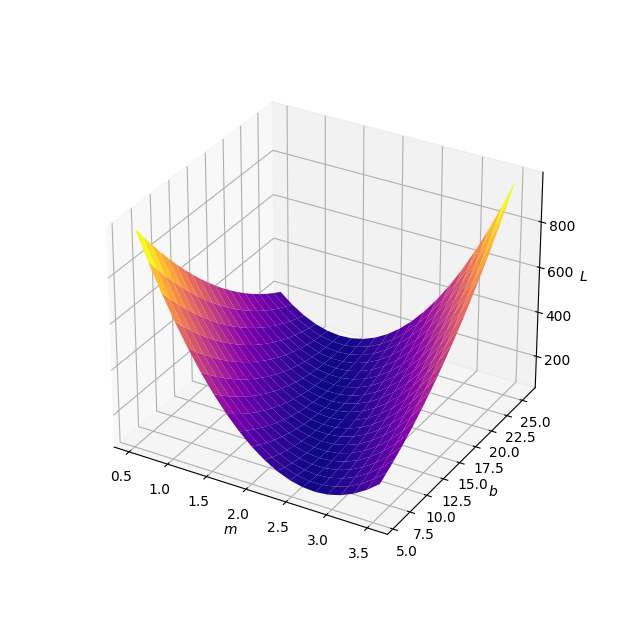

In [3]:
m_span = 1.5
b_span = 10
resolution = 20

m_space = np.linspace(m - m_span, m + m_span, resolution)
b_space = np.linspace(b - b_span, b + b_span, resolution)
m_grid, b_grid = np.meshgrid(m_space, b_space)
Z = np.empty_like(m_grid)
for i in range(len(m_space)):
    for j in range(len(b_space)):
        Z[j, i] = cost(m_space[i], b_space[j]) / len(X)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(m_grid, b_grid, Z, cmap=colormaps.get_cmap('plasma'))
ax.set_xlabel('$m$')
ax.set_ylabel('$b$')
ax.set_zlabel('$L$')
ax.set_box_aspect(aspect=(5,5,4), zoom=.8)
fig.tight_layout(pad=-5)

We can also represent this data in the form of a contour plot. Every point on one line has the same loss and the closer the lines are together, the steeper the slope is between those lines.

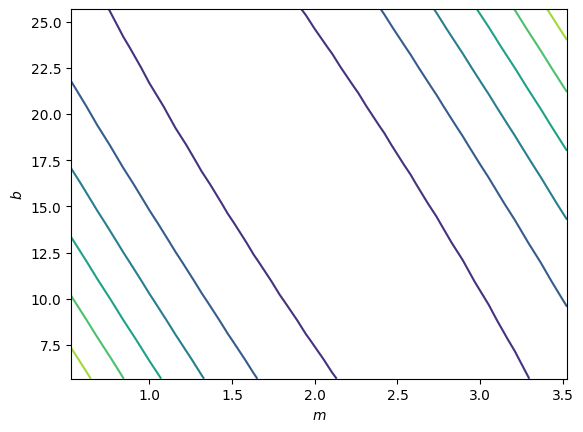

In [4]:
quad_contour = plt.contour(m_grid, b_grid, Z)
quad_contour.axes.set_xlabel('$m$')
quad_contour.axes.set_ylabel('$b$')
plt.show()

Let's pretend we don't know our optimal $m$ and $b$ values. In order to find them using gradient descent, we need to pick a starting value for them. In this case, we will just set both to zero. A common analogy for gradient descent is rolling a marble down a hill, and in fact that is reasonably close to what we are doing. We place our "marble" at the point where $m$ and $b$ are 0 and let it "roll" the gradient to its lowest point. I'll explain this code in a moment, for now just look at the image it produces.

In [5]:
def descend(m, b, learning_rate, X, Y):
    Y_pred = m*X + b  # The current predicted value of Y
    D_m = (-2/len(X)) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_b = (-2/len(X)) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - learning_rate * D_m  # Update m
    b = b - learning_rate * D_b  # Update b

    return m, b

In [6]:
m_space = np.linspace(-1, m + m_span, resolution)
b_space = np.linspace(-1, b + b_span, resolution)
m_grid, b_grid = np.meshgrid(m_space, b_space)
Z = np.empty_like(m_grid)
for i in range(len(m_space)):
    for j in range(len(b_space)):
        Z[j, i] = cost(m_space[i], b_space[j]) / len(X)

start_m = 0
start_b = 0

descend_m_list = np.array([start_m])
descend_b_list = np.array([start_b])
descend_l_list = np.array([cost(start_m, start_b) / len(X)])
for i in range(10000):
    new_m, new_b = descend(descend_m_list[-1], descend_b_list[-1], .0005, X, Y)
    descend_m_list = np.append(descend_m_list, new_m)
    descend_b_list = np.append(descend_b_list, new_b)
    descend_l_list = np.append(descend_l_list, cost(new_m, new_b) / len(X))

In [7]:
fig = mlab.figure()
mlab.surf(m_grid.T, b_grid.T, Z.T, warp_scale=.01, figure=fig)
mlab.points3d(descend_m_list, descend_b_list, descend_l_list*.01, scale_factor=1, figure=fig)
mlab.view(azimuth=-60, elevation=75, focalpoint=[1,10,15], figure=fig) # change azimuth and elevation for different viewing angles
fig

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

As you can see, we start at a high point and make gradually smaller steps as the slope of the surface decreases, eventually approaching the minimum for both values.

Now let's explain the code. We will start off with the most important bit, the `descend` function

In [8]:
def descend(m, b, learning_rate, X, Y):
    Y_pred = m*X + b  # The current predicted value of Y
    D_m = (-2/len(X)) * sum(X * (Y - Y_pred))  # Derivative wrt m
    D_b = (-2/len(X)) * sum(Y - Y_pred)  # Derivative wrt c
    m = m - learning_rate * D_m  # Update m
    b = b - learning_rate * D_b  # Update b

    return m, b

I won't go over how to get the partial derivatives of our new $L$, but they are stated below
$$L_{m, b} = \frac{1}{n}\sum_{i=1}^{n}{(y_i - (mx_i + b))^2}$$
$$\frac{\partial m}{\partial L} = \frac{-2}{n}\sum_{i=1}^{n}{x_i(y_i - (mx_i + b))}$$
$$\frac{\partial b}{\partial L} = \frac{-2}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)}$$
You should see how these correspond with `D_m` and `D_b` respectively. Next we update our values of `m` and `b` to take a small step "down" the function. As derivatives represent slope, we subtract our derivative from our value of `m` or `b` as if the derivative is positive, we want to go backwards to reach the lowest point and vice versa. This means our values of `m` and `b` are now slightly closer to their minimums than they were before.

In [9]:
m_space = np.linspace(-1, m + m_span, resolution)
b_space = np.linspace(-1, b + b_span, resolution)
m_grid, b_grid = np.meshgrid(m_space, b_space)
Z = np.empty_like(m_grid)
for i in range(len(m_space)):
    for j in range(len(b_space)):
        Z[j, i] = cost(m_space[i], b_space[j]) / len(X)

This creates a set of points which are used to plot our loss function in 3d space, sampling different evenly spaced values of `m` and `b` and calculating the loss for each of those points.

In [10]:
start_m = 0
start_b = 0

descend_m_list = np.array([start_m])
descend_b_list = np.array([start_b])
descend_l_list = np.array([cost(start_m, start_b) / len(X)])
for i in range(10000):
    new_m, new_b = descend(descend_m_list[-1], descend_b_list[-1], .0005, X, Y) #descend using the latest m and b, as well as a learning rate of .0005
    descend_m_list = np.append(descend_m_list, new_m)
    descend_b_list = np.append(descend_b_list, new_b)
    descend_l_list = np.append(descend_l_list, cost(new_m, new_b) / len(X))

Here we actually preform gradient descent, starting at `start_m` and `start_b` and recording each step down the hill in its respective list.

In [11]:
fig = mlab.figure()
mlab.surf(m_grid.T, b_grid.T, Z.T, warp_scale=.01, figure=fig)
mlab.points3d(descend_m_list, descend_b_list, descend_l_list*.01, scale_factor=1, figure=fig)
mlab.view(azimuth=-60, elevation=75, focalpoint=[1,10,15], figure=fig) # change azimuth and elevation for different viewing angles
fig

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

The final step just scales and plots the data calculated above using `mayavi` which is a 3d python library. Now all we have to do is plug in our values of `m` and `b` like we did using the formula.

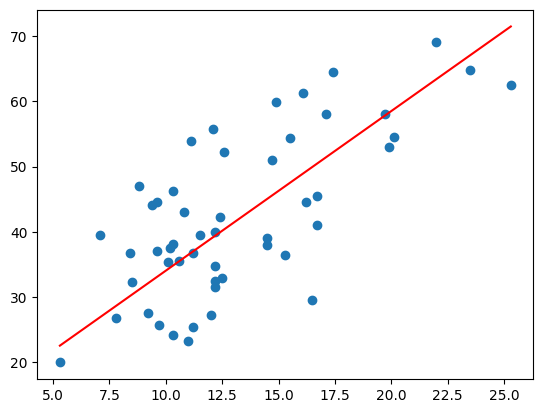

In [12]:
plt.scatter(X,Y)
m = descend_m_list[-1]
b = descend_b_list[-1]
plt.plot([min(X),max(X)], [m*min(X)+b,m*max(X)+b], c='red') # the line of best fit

## Conclusion
Most of the time, you will be using gradient descent instead of the formula as it is a general method and also helps prevent overfitting. This is when your model "memorizes" the correct answers rather than generalizing solutions. Thankfully, you don't have to figure out the derivatives of functions yourself, especially as they become more complex. Here is how it's done with `scikit-learn`

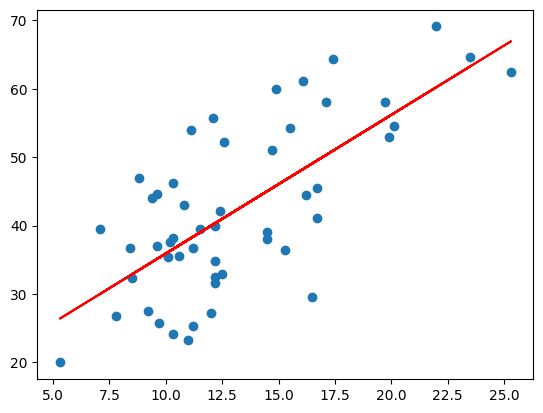

In [13]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X.values.reshape(-1,1), Y.values.reshape(-1,1)) # transformations necessary for scikit-learn
Y_pred = linear_regressor.predict(X.values.reshape(-1,1))

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')